#  전국 지역별 축제 빈도 알아보기

###  *축제 데이터 가져오기*  

데이터는 공공데이터포털[https://www.data.go.kr/data/15013104/standard.do] 을 참고하였습니다.

In [1]:
import pandas as pd 

festival=pd.read_csv('c:/studynotes/data_science/data/전국문화축제표준데이터.csv',encoding='euc-kr')
festival.head()

,축제명,개최장소,축제시작일자,축제종료일자,축제내용,주관기관,주최기관,후원기관,전화번호,홈페이지주소,관련정보,소재지도로명주소,소재지지번주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,[SEMI 예천곤충엑스포] 2022예천곤충축제,곤충생태원+예천읍시가지,2022-08-06,2022-08-15,살아있는 곤충세상 속으로+전시체험+공식행사+학술행사+연계행사,(재)예천문화관광재단,경상북도 예천군,문화체육관광부+경상북도+경상북도 예천군,054-650-6037,http://www.insect-expo.org/,NaN,경상북도 예천군 효자면 은풍로 1045,경상북도 예천군 효자면 고항리 577,36.824436,128.458646,2022-09-08,5230000,경상북도 예천군
1,용궁순대축제,용궁면,2022-08-13,2022-08-14,용궁순대 시식회+체험프로그램+연계행사,예천용궁순대축제추진위원회,경상북도 예천군,경상북도+경상북도 예천군,054-650-6276,https://www.ycg.kr/open.content/tour/festivals...,NaN,NaN,경상북도 예천군 용궁면 읍부리 175-4,36.606300,128.276901,2022-09-08,5230000,경상북도 예천군
2,삼강주막나루터축제,예천삼강문화단지,2022-09-10,2022-09-12,체험 및 소풍 프로그램+무대공연+원도심 연계프로그램,예천문화사업단,경상북도 예천군,경상북도+경상북도 예천군,054-650-6912,https://www.ycg.kr/open.content/tour/festivals...,NaN,경상북도 예천군 풍양면 삼강리길 33,경상북도 예천군 풍양면 삼강리 145,36.563890,128.299296,2022-09-08,5230000,경상북도 예천군
3,예천장터농산물대축제,한천체육공원,2022-10-14,2022-10-16,지역 우수농산물 홍보 및 판매+무대공연+체험프로그램,예천농산물축제추진위원회,경상북도 예천군,경상북도 예천군,054-650-6271,https://www.ycg.kr/open.content/tour/festivals...,NaN,NaN,경상북도 예천군 예천읍 남본리 310-1,36.648102,128.449211,2022-09-08,5230000,경상북도 예천군
4,봉화은어축제,봉화읍 내성천 일원,2022-07-30,2022-08-07,은어반두잡이+맨손잡이 체험 등,(재)봉화축제관광재단,경상북도 봉화군,NaN,054-674-3053,https://bhftf.co.kr:8091/,분천산타마을+봉화은어축제,NaN,경북 봉화군 봉화읍 내성리 506,36.888879,128.737825,2022-09-05,5240000,경상북도 봉화군


### *지리적 데이터 시각화*

Text(0, 0.5, 'latitude')

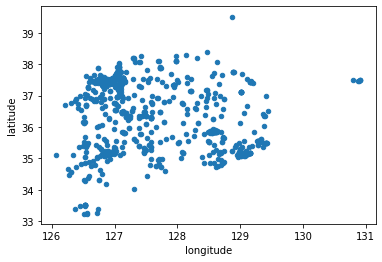

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

festival.plot(kind="scatter", x="경도", y="위도")
plt.xlabel('longitude')
plt.ylabel('latitude')

## 분산되어 있는 점들 지역별로 합치기  
- 지역별 본청 소재지를 기준으로 데이터를 재분류합니다.
- 제주도를 제외한 섬은 제외하였습니다.

### *지역별 본청 주소  가져오기*


In [3]:
city_hall=pd.read_excel('c:/studynotes/data_science/data/지역별_본청_소재지.xlsx',engine='openpyxl')
city_hall=city_hall.drop(['Unnamed: 2','Unnamed: 3'],axis=1)

city_hall.head()

,CityHall,Address
0,서울특별시,서울 중구
1,부산광역시,부산 연제구
2,대구광역시,대구 중구
3,인천광역시,인천광역시 남동구
4,광주광역시,광주광역시 서구


### *지오코딩을 사용하여 본청 주소를 경도,위도로 변환*

In [4]:
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    return [str(geo.latitude),str(geo.longitude)]

In [5]:
coords=pd.DataFrame({'latitude':[],'longitude':[]})

for i in city_hall.index:
    pos=geocoding(city_hall.loc[i,'Address'])
    coords.loc[i]=pos

city=pd.concat([city_hall,coords],axis=1)
city.set_index('CityHall', inplace=True)

city.head()

,Address,latitude,longitude
CityHall,,,
서울특별시,서울 중구,37.5560278,126.9722244
부산광역시,부산 연제구,35.1765,129.0793
대구광역시,대구 중구,35.8760013,128.5960548
인천광역시,인천광역시 남동구,37.446902,126.7315126
광주광역시,광주광역시 서구,35.1521401,126.8900561


In [6]:
festival=festival.fillna("")

cnt={}

festival_cnt=pd.DataFrame({'CityHall':[],'count':[]})

for i in festival['소재지도로명주소']:
    if i:
        cnt.setdefault(i.split()[0],0)
        cnt[i.split()[0]]+=1
        
for i in range(len(cnt)):
    ls=list(cnt.items())[i]
    festival_cnt.loc[i]=[ls[0],ls[1]]

festival_cnt.head()


,CityHall,count
0,경상북도,33.0
1,경기도,184.0
2,강원도,63.0
3,울산광역시,29.0
4,대구광역시,145.0


- 편의를 위해 축제의 횟수가 7이하로 열리는 지역은 제외하였습니다.

In [7]:
cnt_filter=festival_cnt[festival_cnt['count']<=7].index
festival_cnt=festival_cnt.drop(cnt_filter)

festival_cnt.set_index('CityHall', inplace=True)

city=pd.concat([city,festival_cnt],axis=1)

city

,Address,latitude,longitude,count
서울특별시,서울 중구,37.5560278,126.9722244,43.0
부산광역시,부산 연제구,35.1765,129.0793,34.0
대구광역시,대구 중구,35.8760013,128.5960548,145.0
인천광역시,인천광역시 남동구,37.446902,126.7315126,26.0
광주광역시,광주광역시 서구,35.1521401,126.8900561,35.0
대전광역시,대전광역시 서구,36.2973919,127.3544493,8.0
울산광역시,울산광역시 남구,35.49879045,129.34585752694252,29.0
강원도,강원도 춘천시,37.8810569,127.7297641,63.0
경기도,경기도 수원시 영통구,37.2593,127.0466,184.0
경상남도,경상남도 창원시 의창구,35.2537,128.6401,53.0
